## 実習の準備

### ライブラリのimport

In [1]:
# 必要なライブラリのimport
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# TensorFlow
import tensorflow as tf
#from tensorflow import keras
#from tensorflow.keras.layers import Dense, Activation, Dropout
#from tensorflow.keras import regularizers

# データの分割
from sklearn.model_selection import train_test_split

# 画像データのデータセットを取得するためにsklearnを使用
from sklearn import datasets

# DataFrameで全ての列を表示する設定
pd.options.display.max_columns = None

### データの読み込み

In [2]:
# MNISTのデータセットを読み込む
digits = datasets.load_digits()

### データの確認

In [3]:
# digitsの構成
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [4]:
# 説明の表示
print(digits['DESCR'])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

In [5]:
# data:説明変数
digits['data'].shape

(1797, 64)

In [6]:
# dataから1枚の画像データを取得
temp = digits['data'][0]

# 8x8にreshape
temp = temp.reshape(8,8)
temp

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

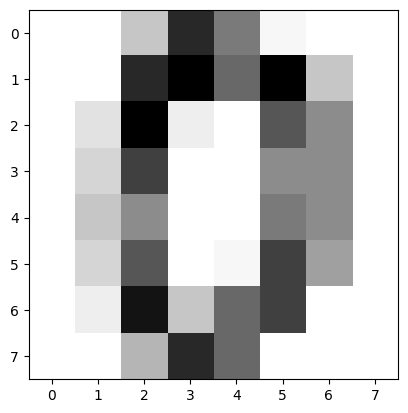

In [7]:
# 画像化して表示
# カラーマップは 'Greys' を使用
#（数値が大きいほどピクセルは黒く表示される）
plt.imshow(temp, cmap='Greys', vmin=0, vmax=15)

In [8]:
# 対応する目的変数を確認
digits['target'][0]

np.int64(0)

### データの前処理

In [9]:
# 目的変数（Y）：target、説明変数（X）：data
Y = digits['target']
X = digits['data']

In [10]:
# 形状の確認
print(Y.shape)
print(X.shape)

(1797,)
(1797, 64)


In [11]:
# カテゴリー変数への展開
Y = tf.keras.utils.to_categorical(Y)

In [12]:
# 形状の確認
print(Y.shape)
print(X.shape)

(1797, 10)
(1797, 64)


In [13]:
# Yのデータを1個確認
Y[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

## Dense（全結合）層のみを使ったモデルの構築と学習

### モデルの構築

In [14]:
# 説明変数の例
X[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [15]:
# データの分割
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.3, random_state=0)

In [16]:
# 形状を確認
print("Y_train=", Y_train.shape, ", X_train=", X_train.shape)
print("Y_valid=", Y_valid.shape, ", X_valid=", X_valid.shape)
print("Y_test=", Y_test.shape, ", X_test=", X_test.shape)

Y_train= (879, 10) , X_train= (879, 64)
Y_valid= (378, 10) , X_valid= (378, 64)
Y_test= (540, 10) , X_test= (540, 64)


In [17]:
# モデルの初期化
model = tf.keras.Sequential([
    # 入力層
    tf.keras.Input(shape=(64,)),
    tf.keras.layers.Dense(16, activation='relu'),
    # 隠れ層
    tf.keras.layers.Dense(16, activation='relu'),
    # 出力層
    tf.keras.layers.Dense(10, activation='softmax')
])

# モデルの構築
model.compile(optimizer = "rmsprop", loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
# モデルの構造を表示
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,482 (5.79 KB)

 Trainable params: 1,482 (5.79 KB)

 Non-trainable params: 0 (0.00 B)

### 学習の実施

In [19]:
%%time
# 学習の実施
log = model.fit(X_train, Y_train, epochs=5000, batch_size=32, verbose=True,
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                            min_delta=0, patience=100,
                                                            verbose=1)],
                validation_data=(X_valid, Y_valid))

Epoch 1/5000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1479 - loss: 4.2406 - val_accuracy: 0.1852 - val_loss: 2.8807
Epoch 2/5000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2321 - loss: 2.3961 - val_accuracy: 0.2460 - val_loss: 2.1328
Epoch 3/5000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3675 - loss: 1.8177 - val_accuracy: 0.4418 - val_loss: 1.7257
Epoch 4/5000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5210 - loss: 1.4415 - val_accuracy: 0.5291 - val_loss: 1.4274
Epoch 5/5000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6109 - loss: 1.1744 - val_accuracy: 0.5873 - val_loss: 1.2094
Epoch 6/5000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6826 - loss: 0.9840 - val_accuracy: 0.6667 - val_loss: 1.0363
Epoch 7/5000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7361 - loss: 0.7937 - val_accuracy: 0.7116 - val_loss: 0.8304
Epoch 8/5000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7895 - loss: 0.6569 - val_accuracy: 0.

Text(0, 0.5, 'crossentropy')

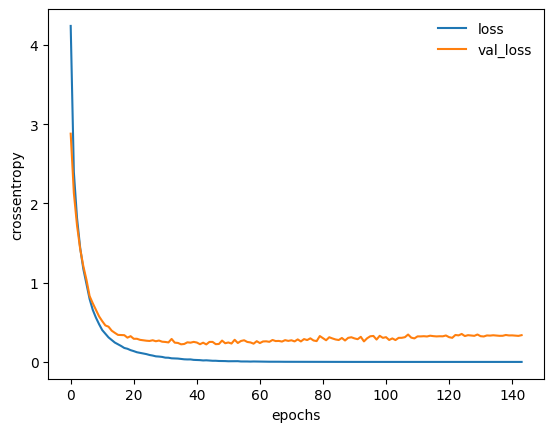

In [20]:
# 学習過程をグラフ表示
plt.plot(log.history['loss'], label='loss')
plt.plot(log.history['val_loss'], label='val_loss')
plt.legend(frameon=False) # 凡例の表示
plt.xlabel("epochs")
plt.ylabel("crossentropy")

### テストデータによる評価

In [21]:
# テストデータで予測を実施し、カテゴリー変数へ復元する
Y_pred = np.argmax(model.predict(X_test), axis=1)

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [22]:
# テストデータのカテゴリー変数への復元
Y_test_ = np.argmax(Y_test, axis=1)

In [23]:
# モデルの評価
from sklearn.metrics import classification_report

print(classification_report(Y_test_, Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.92      0.94      0.93        52
           2       0.98      0.96      0.97        53
           3       0.93      0.94      0.94        54
           4       0.94      0.94      0.94        48
           5       1.00      0.93      0.96        57
           6       0.95      0.98      0.97        60
           7       0.96      0.94      0.95        53
           8       0.93      0.93      0.93        61
           9       0.90      0.93      0.91        57

    accuracy                           0.95       540
   macro avg       0.95      0.95      0.95       540
weighted avg       0.95      0.95      0.95       540



## CNN（畳み込み）層を使ったモデルの構築と学習

### モデルの構築

In [24]:
# 8x8の画像の形状にreshape
X2 = X.reshape(len(X), 8, 8, 1)

In [25]:
# 形状を確認
print(X2.shape)

(1797, 8, 8, 1)


In [26]:
# データの分割。X2を使っていることに注意
X_train, X_test, Y_train, Y_test = train_test_split(X2, Y, test_size=0.3, random_state=0)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.3, random_state=0)

In [27]:
# 形状を確認
print("Y_train=", Y_train.shape, ", X_train=", X_train.shape)
print("Y_valid=", Y_valid.shape, ", X_valid=", X_valid.shape)
print("Y_test=", Y_test.shape, ", X_test=", X_test.shape)

Y_train= (879, 10) , X_train= (879, 8, 8, 1)
Y_valid= (378, 10) , X_valid= (378, 8, 8, 1)
Y_test= (540, 10) , X_test= (540, 8, 8, 1)


In [28]:
# モデルの初期化
model = tf.keras.Sequential([
    # 入力層
    tf.keras.Input(shape=(8, 8, 1)),
    tf.keras.layers.Conv2D(32, kernel_size=3, padding="same", strides=1, activation="relu"),
    tf.keras.layers.Flatten(),
    # 隠れ層
    tf.keras.layers.Dense(16, activation='relu'),
    # 出力層
    tf.keras.layers.Dense(10, activation='softmax')
])

# モデルの構築
model.compile(optimizer = "rmsprop", loss='categorical_crossentropy', metrics=['accuracy'])

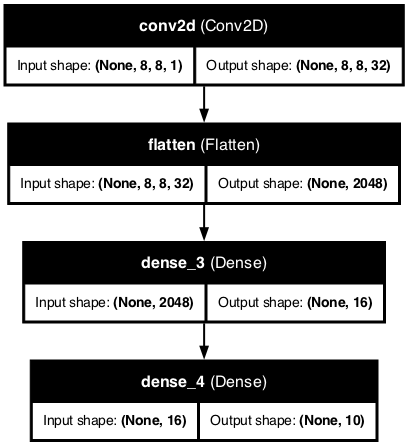

In [29]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True, dpi=72)

In [30]:
# モデルの構造を表示
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 8, 8, 32)       │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │        32,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,274 (129.98 KB)

 Trainable params: 33,274 (129.98 KB)

 Non-trainable params: 0 (0.00 B)

### 学習の実施

In [31]:
%%time
# 学習の実施
log = model.fit(X_train, Y_train, epochs=5000, batch_size=32, verbose=True,
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                            min_delta=0, patience=100,
                                                            verbose=1)],
                validation_data=(X_valid, Y_valid))

Epoch 1/5000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4596 - loss: 1.7327 - val_accuracy: 0.6825 - val_loss: 1.0077
Epoch 2/5000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7964 - loss: 0.7038 - val_accuracy: 0.8175 - val_loss: 0.6016
Epoch 3/5000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8931 - loss: 0.3730 - val_accuracy: 0.8598 - val_loss: 0.4587
Epoch 4/5000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9352 - loss: 0.2268 - val_accuracy: 0.9233 - val_loss: 0.2713
Epoch 5/5000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9534 - loss: 0.1848 - val_accuracy: 0.8519 - val_loss: 0.4034
Epoch 6/5000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9647 - loss: 0.1416 - val_accuracy: 0.9206 - val_loss: 0.2092
Epoch 7/5000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9693 - loss: 0.0940 - val_accuracy: 0.9233 - val_loss: 0.2410
Epoch 8/5000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9807 - loss: 0.0760 - val_accuracy: 0.

Text(0, 0.5, 'crossentropy')

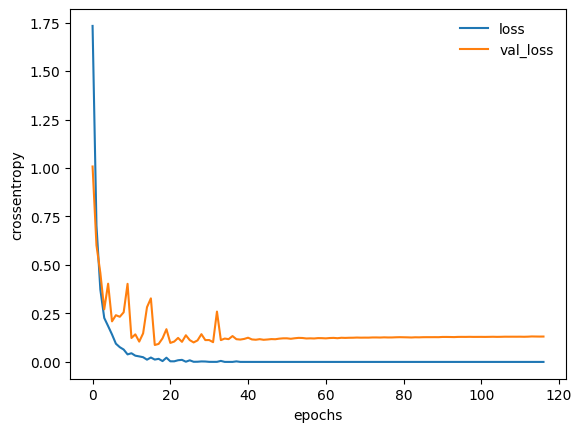

In [32]:
# 学習過程をグラフ表示
plt.plot(log.history['loss'], label='loss')
plt.plot(log.history['val_loss'], label='val_loss')
plt.legend(frameon=False) # 凡例の表示
plt.xlabel("epochs")
plt.ylabel("crossentropy")

### テストデータによる評価

In [33]:
# テストデータで予測を実施し、カテゴリー変数へ復元する
Y_pred = np.argmax(model.predict(X_test), axis=1)

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [34]:
# テストデータのカテゴリー変数の復元
Y_test_ = np.argmax(Y_test, axis=1)

In [35]:
# モデルの評価
print(classification_report(Y_test_, Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.96      0.96      0.96        52
           2       1.00      0.98      0.99        53
           3       0.98      0.98      0.98        54
           4       0.96      0.98      0.97        48
           5       0.98      0.96      0.97        57
           6       0.97      0.98      0.98        60
           7       0.98      0.98      0.98        53
           8       0.97      0.97      0.97        61
           9       0.96      0.96      0.96        57

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



### 畳み込み層の学習の詳細

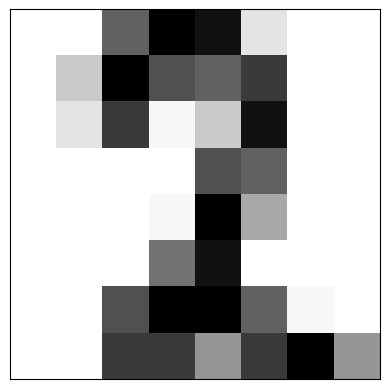

In [38]:
# テストデータの0番目を可視化
plt.imshow(X_test[0].reshape(8, 8), cmap='Greys')
plt.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)

In [39]:
# 対応するラベルを確認
np.argmax(Y_test[0])

np.int64(2)

In [40]:
# モデルの重み（パラメータ）の取得
w = model.get_weights()

In [41]:
# 0番目の層（Conv2D)を取得
w0 = w[0]

In [42]:
# 形状の確認
w0.shape

(3, 3, 1, 32)

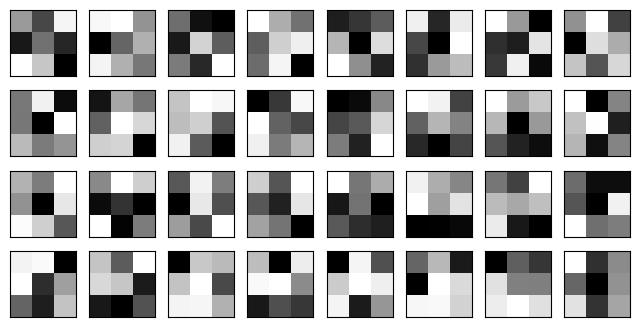

In [43]:
# Conv2D層のフィルターの可視化

# 4行8列にグラフを分割
fig, ax = plt.subplots(4, 8, figsize=(8, 4))

for i in range(4):
    for j in range(8):
        # zは左上から数えたグラフの描画位置
        z = i * 8 + j

        # 行=i、列=jの位置に画像を描画する
        ax[i, j].imshow(w0[:, :, :, z].reshape(3, 3), cmap='Greys')

        # 目盛を表示しない設定
        ax[i, j].tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)

plt.show()

In [44]:
# 各層の出力を取得
layer_outputs = [layer.output for layer in model.layers]

In [45]:
# 最初の層の情報を表示
layer_outputs[0]

<KerasTensor shape=(None, 8, 8, 32), dtype=float32, sparse=False, ragged=False, name=keras_tensor_5>

In [46]:
# モデル全体の入力部分の情報を表示
model.inputs[0]

<KerasTensor shape=(None, 8, 8, 1), dtype=float32, sparse=False, ragged=False, name=keras_tensor_4>

In [47]:
# 入力:モデルの入力、出力:Conv2Dの出力
activation_model = tf.keras.Model(inputs=model.inputs[0], outputs=layer_outputs[0])
activation_model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 8, 8, 1)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 8, 8, 32)       │           320 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 320 (1.25 KB)

 Trainable params: 320 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

In [48]:
# 予測:Conv2Dの結果が出力される
activations = activation_model.predict(X_test[0:1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


In [51]:
activations.shape

(1, 8, 8, 32)

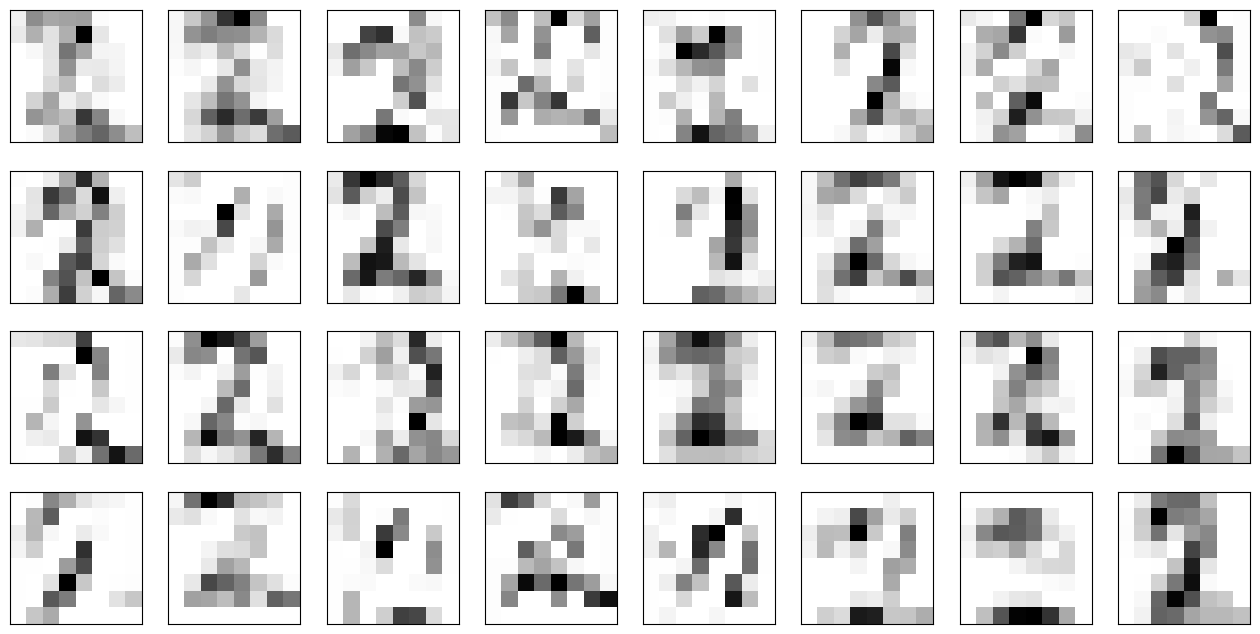

In [49]:
# Conv2D層の結果を可視化
# 4行8列にグラフを分割
fig, ax = plt.subplots(4, 8, figsize=(16, 8))

for i in range(4):
    for j in range(8):
        # zは左上から数えたグラフの描画位置
        z = i * 8 + j

        # 行=i、列=jの位置に画像を描画する
        ax[i, j].imshow(activations[0, :, :, z], cmap='Greys')

        # 目盛を表示しない設定
        ax[i, j].tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)

plt.show()

## モデルの性能を上げよう

In [52]:
# モデルの初期化
model = tf.keras.Sequential([
    # 入力層
    tf.keras.Input(shape=(8, 8, 1)),

    # 最初の畳み込みブロック
    tf.keras.layers.Conv2D(64, kernel_size=3, padding="same", activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),

    # 2番目の畳み込みブロック
    tf.keras.layers.Conv2D(128, kernel_size=3, padding="same", activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),

    # 全結合層への準備
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.001)), # 正則化
    tf.keras.layers.Dropout(0.5),

    # 出力層
    tf.keras.layers.Dense(10, activation='softmax')
])

# モデルの構築
model.compile(optimizer = "rmsprop", loss='categorical_crossentropy', metrics=['accuracy'])

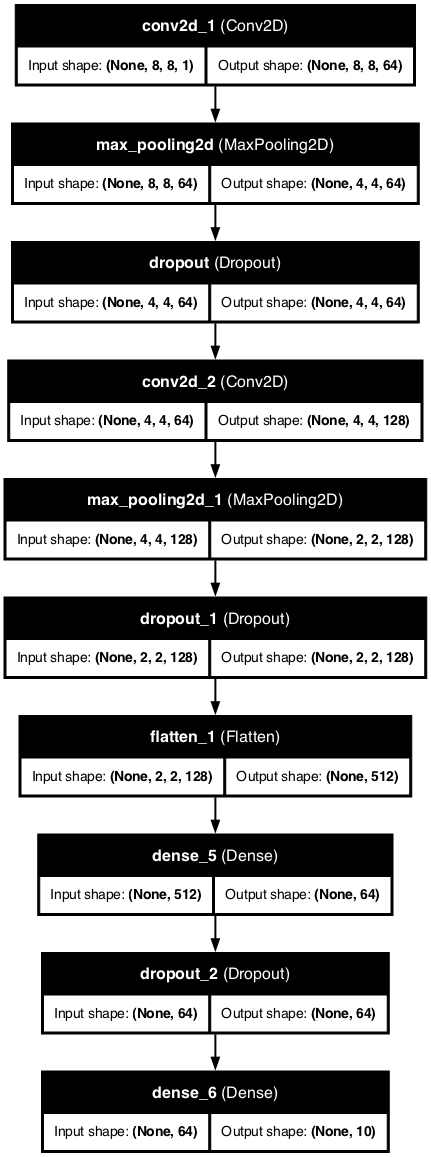

In [53]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True, dpi=72)

In [48]:
# モデルの構造を表示
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 8, 8, 64)       │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 107,978 (421.79 KB)

 Trainable params: 107,978 (421.79 KB)

 Non-trainable params: 0 (0.00 B)

In [54]:
%%time
# 学習の実施
log = model.fit(X_train, Y_train, epochs=5000, batch_size=32, verbose=True,
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                            min_delta=0, patience=100,
                                                            verbose=1)],
                validation_data=(X_valid, Y_valid))

Epoch 1/5000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1684 - loss: 2.5345 - val_accuracy: 0.4841 - val_loss: 1.9628
Epoch 2/5000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4312 - loss: 1.8035 - val_accuracy: 0.7778 - val_loss: 1.0985
Epoch 3/5000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5813 - loss: 1.2921 - val_accuracy: 0.8810 - val_loss: 0.7698
Epoch 4/5000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7133 - loss: 0.9517 - val_accuracy: 0.9021 - val_loss: 0.4879
Epoch 5/5000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7895 - loss: 0.7314 - val_accuracy: 0.9074 - val_loss: 0.4066
Epoch 6/5000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8237 - loss: 0.6219 - val_accuracy: 0.9550 - val_loss: 0.2589
Epoch 7/5000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8612 - loss: 0.4821 - val_accuracy: 0.9577 - val_loss: 0.2128
Epoch 8/5000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8987 - loss: 0.3896 - val_accuracy: 0.

Text(0, 0.5, 'crossentropy')

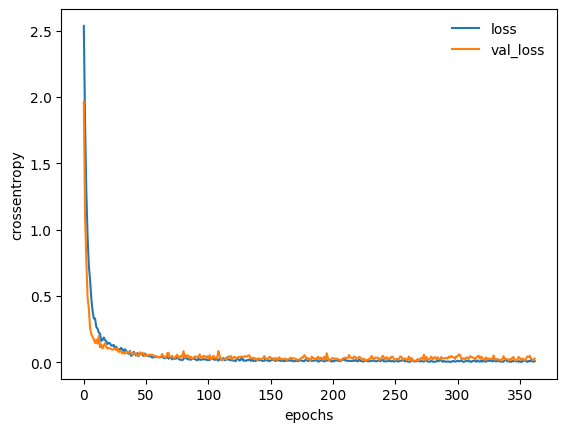

In [55]:
# 学習過程をグラフ表示
plt.plot(log.history['loss'], label='loss')
plt.plot(log.history['val_loss'], label='val_loss')
plt.legend(frameon=False) # 凡例の表示
plt.xlabel("epochs")
plt.ylabel("crossentropy")

In [56]:
# テストデータで予測を実施し、カテゴリー変数へ復元する
Y_pred = np.argmax(model.predict(X_test), axis=1)

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [57]:
# テストデータのカテゴリー変数への復元
Y_test_ = np.argmax(Y_test, axis=1)

In [58]:
# モデルの評価
print(classification_report(Y_test_, Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.98      1.00      0.99        52
           2       1.00      0.98      0.99        53
           3       0.96      1.00      0.98        54
           4       1.00      1.00      1.00        48
           5       1.00      0.98      0.99        57
           6       1.00      1.00      1.00        60
           7       0.98      1.00      0.99        53
           8       1.00      0.97      0.98        61
           9       0.98      0.98      0.98        57

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540



## 補足

### モデルの保存と読み込み

In [54]:
# モデルの保存（Keras形式）
model.save('./my_model.keras')

In [55]:
# モデルの読み込み（Keras形式）
model2 = tf.keras.models.load_model('./my_model.keras')

In [56]:
# 読み込んだモデルによる予測
Y_pred = np.argmax(model2.predict(X_test), axis=1)

# モデルの評価
print(classification_report(Y_test_, Y_pred))

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.98      1.00      0.99        52
           2       1.00      0.98      0.99        53
           3       1.00      0.98      0.99        54
           4       1.00      1.00      1.00        48
           5       1.00      0.96      0.98        57
           6       0.98      1.00      0.99        60
           7       0.96      1.00      0.98        53
           8       1.00      0.98      0.99        61
           9       0.98      1.00      0.99        57

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540



### 実際のデータによる予測

In [57]:
# 必要なモジュールの追加読み込み
from PIL import Image

In [58]:
# 画像データの読み込み
image = Image.open('./img2.png')

# グレースケールに変換
image = image.convert('L')

# 表示
image

In [59]:
# numpy配列に変換
image_data = np.asarray(image, dtype=np.float64)
image_data

array([[255., 255.,  94.,   0.,   0., 255., 255., 255.],
       [255., 202.,   0.,  87., 104.,  16., 255., 255.],
       [255., 234.,   4., 255., 239.,   0., 255., 255.],
       [255., 255., 255., 255.,  48.,  87., 255., 255.],
       [255., 255., 255., 255.,   0., 181., 255., 255.],
       [255., 255., 255.,  99.,   0., 255., 255., 255.],
       [255., 255.,  49.,   0.,   0.,  82., 255., 255.],
       [255., 255.,  31.,  56., 186.,  46.,   0., 153.]])

In [60]:
# ネガポジ反転
image_data = 255 - image_data

# 16階調に変更
image_data = np.round(image_data/255*15)

# reshape
image_data = image_data.reshape(1, 8, 8, 1)

In [61]:
# 予測
Y_pred = np.argmax(model2.predict(image_data), axis=1)

# 結果の表示
print(Y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
[2]
